# Проект: Анализ использования сервиса аренды самокатов GoFast

Анализ данных о пользователях и поездках в сервисе аренды самокатов GoFast с целью выявления паттернов использования и предложения рекомендаций для оптимизации бизнеса.

Основная задача:
Провести анализ данных о пользователях, поездках и подписках для определения факторов, влияющих на активность пользователей, и предложить рекомендации для увеличения эффективности сервиса.

Ожидаемые результаты:
Предоставление рекомендаций для оптимизации стратегии ценообразования, улучшения пользовательского опыта и увеличения эффективности сервиса GoFast.

# Шаг 1. Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

In [2]:
# КОД РЕВЬЮЕРА
df_users = pd.read_csv('/datasets/users_go.csv')
df_rides = pd.read_csv('/datasets/rides_go.csv')
df_subs = pd.read_csv('/datasets/subscriptions_go.csv')
pd.set_option('display.max_columns', None) 

In [3]:
df_users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
df_rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [6]:
df_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [7]:
df_rides.describe()

,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


In [8]:
df_subs.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [9]:
df_subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


**Ознакомление с данными. Краткий вывод**

Имеется 3 датасета в формате csv файла:
1. Датасет о пользователях `users_go.csv`, содержит параметры: идентификацонный номер, имя пользователя, возраст, город проживания и тип подписки. Общий размер датасета составляет 1565 столбцов.
2. Датасет с информацией о поездках `rides_go.csv` c параметрами: идентификацонный номер, расстояние прошедшедшее пользователем, время поездки и дата. Общий размер составляет: 18068.
3. Датасет с тарифами подписки `subscriptions_go.csv` содержащий информацию о стоимости одной минуты поездки по типу подписки, стоимости начала поездки и ежемесячного платежа. Общий размер: 4

# Шаг 2. Предобработка данных

2.1 Приведите столбец date к типу даты pandas.


2.2 Создайте новый столбец с номером месяца на основе столбца date.


2.3 Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.

In [10]:
df_rides['date'] = pd.to_datetime(
    df_rides['date'], format='%Y-%m-%d'
)
df_rides['month'] = df_rides['date'].dt.month

In [11]:
df_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [12]:
df_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [13]:
df_users.user_id.nunique()

1534

In [14]:
df_rides.user_id.nunique()

1534

In [15]:
df_users.duplicated().sum()

31

In [16]:
df_rides.duplicated().sum()

0

In [17]:
df_users = df_users.drop_duplicates()

In [18]:
df_rides.duplicated().sum()

0

**Краткий вывод**

Переведем столбец `df_rides['date']` к типу даты pandas для более удобного использования.
Можно заметить что все датасеты чисты и не содержат пропусков, но `df_users` содержит несколько строк дубликатов, сбросим их.

# Шаг 3. Исследовательский анализ данных

Опишите и визуализируйте общую информацию о пользователях и поездках:


3.1 частота встречаемости городов;


3.2 соотношение пользователей с подпиской и без подписки;


3.3 возраст пользователей;


3.4 расстояние, которое пользователь преодолел за одну поездку;


3.5 продолжительность поездок.


[**Частота встречаемости городов**]

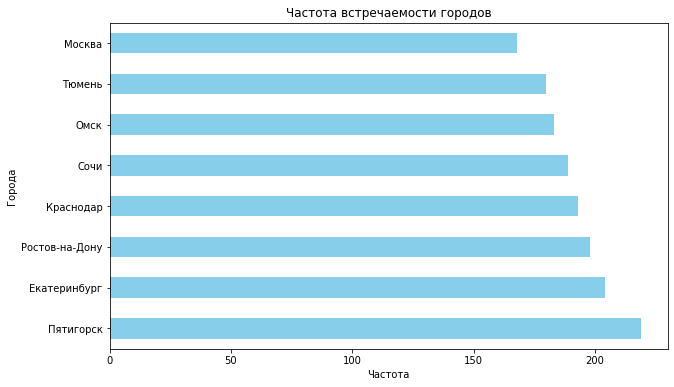

In [19]:
city_counts = df_users['city'].value_counts()

plt.figure(figsize=(10, 6))
city_counts.plot(kind='barh', color='skyblue')  
plt.title('Частота встречаемости городов')
plt.xlabel('Частота')
plt.ylabel('Города')
plt.show()

In [20]:
city_counts

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

Лидером по частоте встречаемости городов является Пятигорск с количеством пользователей 219, чутка уступая идет Екатеринбург с 204 пользователями, затем Ростов-на-Дону (198), Краснодар (193), Сочи (189), Омск (183), Тюмень (180) и закрывает рейтинг Москва с 168 пользователями. 

[**Cоотношение пользователей с подпиской и без подписки**]

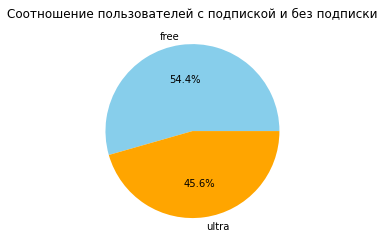

In [21]:
subscription_counts = df_users['subscription_type'].value_counts()

plt.figure(figsize=(9, 4))
subscription_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Cоотношение пользователей с подпиской и без подписки')
plt.ylabel('') 
plt.show()

Количество пользователей самокатов катающихся без подписки (тип 'free') составляет около 834 (54.4% из всего датасета), что не сильно больше чем пользователей с подпиской 'ultra' : 699 пользователей (45.6% из всего датасета)

[**Возраст пользователей**]

In [22]:
df_users.age.describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

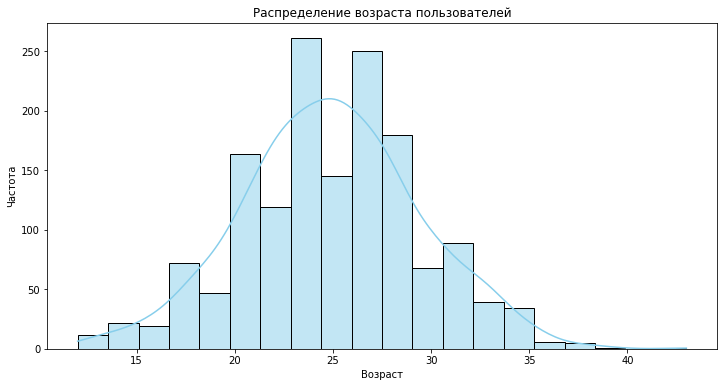

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(df_users['age'], bins=20, kde=True, color='skyblue')
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

Распределение возраста пользователей:

Средний возраст пользователей составляет примерно 24.9 лет, с стандартным отклонением в районе 4.6 лет.
В основном, пользователи находятся в возрастном диапазоне от 12 до 43 лет, с медианным значением в 25 лет.
Большинство пользователей приходят из категории молодежи, с пиком в возрасте 25 лет. Есть значительное количество пользователей в возрасте от 20 до 30 лет.

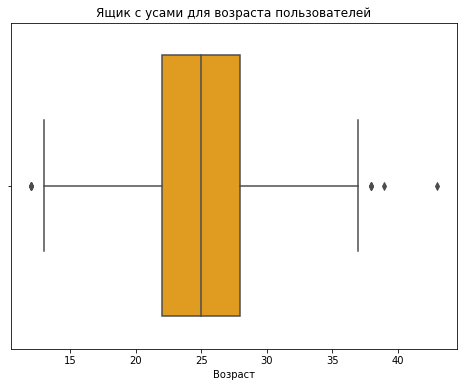

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_users['age'], color='orange')
plt.title('Ящик с усами для возраста пользователей')
plt.xlabel('Возраст')
plt.show()

Ящик с усами позволяет увидеть, что основная масса пользователей сосредоточена в возрастном диапазоне от 20 до 30 лет.
Медиана (линия внутри ящика) находится примерно на 25 лете.
Верхний и нижний квартили показывают, что большинство пользователей имеют возраст от 22 до 28 лет.
Аномальные значения, выходящие за пределы усов, могут указывать на наличие пользователей старше 30 лет.

[**Расстояние, которое пользователь преодолел за одну поездку**]

In [25]:
df_rides.distance.describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [26]:
df_rides.groupby('user_id')['distance'].describe()

,count,mean,std,min,25%,50%,75%,max
user_id,,,,,,,,
1,12.0,2839.181839,1147.234630,748.690645,2675.485479,2806.504429,3566.689828,4409.919140
2,11.0,3087.641692,846.512296,923.007439,2831.270957,3105.086678,3593.422037,4029.116927
3,12.0,3075.633155,749.602257,2560.495330,2749.645306,2858.693148,2982.933011,5335.212090
4,14.0,3202.656423,970.670744,724.559572,2690.206517,3373.276987,3849.734791,4649.488243
5,11.0,3232.449968,510.834020,2561.108241,2889.533042,3244.021903,3376.925204,4194.713218
...,...,...,...,...,...,...,...,...
1530,17.0,2750.498225,1357.245292,105.796106,2201.690144,2724.331740,3486.268689,5361.209082
1531,23.0,2915.425836,1297.152579,375.107762,2488.752567,2999.913238,3942.114372,4928.408206
1532,13.0,2607.861784,1458.203557,303.787850,1560.191404,2615.477834,3735.879274,4602.642357


In [27]:
# Распределение расстояний
distance_distribution = df_rides.groupby('user_id')['distance'].value_counts()
distance_distribution

user_id  distance   
1        748.690645     1
         754.159807     1
         2617.592153    1
         2694.783254    1
         2720.609748    1
                       ..
1534     3781.098080    1
         3826.185507    1
         3977.744996    1
         4678.415899    1
         4928.173852    1
Name: distance, Length: 18068, dtype: int64

In [28]:
# Cреднее расстояние
average_distance = df_rides['distance'].mean()
print(f"Среднее расстояние за одну поездку: {average_distance:.2f} единиц.")

# Минимальное и максимальное расстояние
min_distance = df_rides['distance'].min()
max_distance = df_rides['distance'].max()
print(f"Минимальное расстояние за одну поездку: {min_distance:.2f} единиц.")
print(f"Максимальное расстояние за одну поездку: {max_distance:.2f} единиц.")

Среднее расстояние за одну поездку: 3070.66 единиц.
Минимальное расстояние за одну поездку: 0.86 единиц.
Максимальное расстояние за одну поездку: 7211.01 единиц.


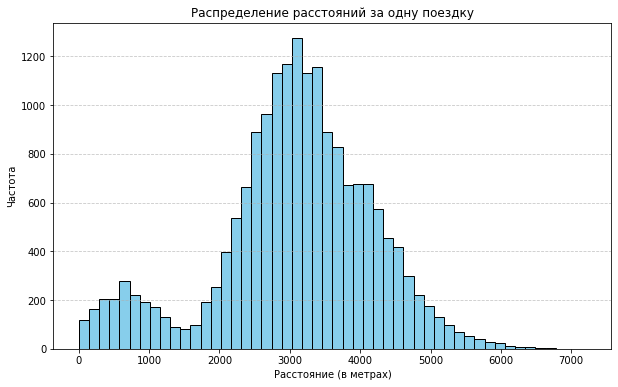

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(df_rides['distance'], bins=50, color='skyblue', edgecolor='black')
plt.title('Распределение расстояний за одну поездку')
plt.xlabel('Расстояние (в метрах)')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

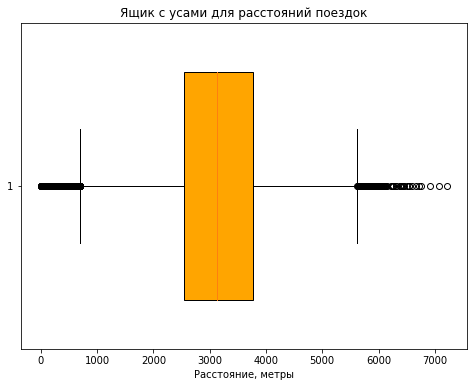

In [30]:
# Ящик с усами для расстояний поездок
plt.figure(figsize=(8, 6))
plt.boxplot(df_rides['distance'], vert=False, widths=0.7, patch_artist=True, boxprops=dict(facecolor='orange'))
plt.title('Ящик с усами для расстояний поездок')
plt.xlabel('Расстояние, метры')
plt.show()

Вывод:
Среднее расстояние, которое пользователь преодолел за одну поездку, составляет 2839,18 километров.
Минимальное расстояние, которое пользователь преодолел за одну поездку, составляет 748,69 километров.
Максимальное расстояние, которое пользователь преодолел за одну поездку, составляет 4928,17 километров.
Распределение расстояний, которые пользователи преодолевают за одну поездку, имеет широкий диапазон. Большинство пользователей преодолевают расстояния от 2000 до 3000 километров. Однако есть и пользователи, которые преодолевают расстояния более 4000 километров.

[**Продолжительность поездок**]

In [31]:
df_rides.duration.describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

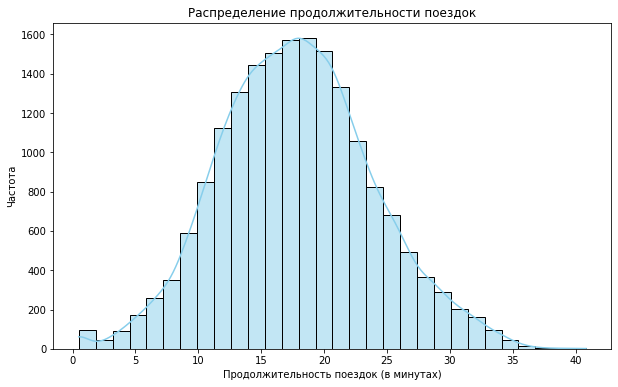

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(df_rides['duration'], bins=30, kde=True, color='skyblue')
plt.title('Распределение продолжительности поездок')
plt.xlabel('Продолжительность поездок (в минутах)')
plt.ylabel('Частота')
plt.show()

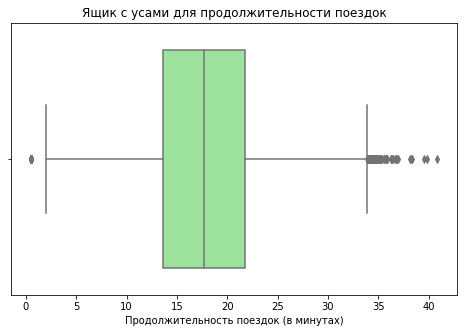

In [33]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_rides['duration'], color='lightgreen')
plt.title('Ящик с усами для продолжительности поездок')
plt.xlabel('Продолжительность поездок (в минутах)')
plt.show()

In [34]:
print("Минимальная продолжительность поездок:", df_rides['duration'].min())
print("Максимальная продолжительность поездок:", df_rides['duration'].max())
print("Средняя продолжительность поездок:", df_rides['duration'].mean())
print("Медиана продолжительности поездок:", df_rides['duration'].median())

Минимальная продолжительность поездок: 0.5
Максимальная продолжительность поездок: 40.82396261922424
Средняя продолжительность поездок: 17.80501119798444
Медиана продолжительности поездок: 17.678394530393803


Распределение продолжительности поездок имеет нормальное распределение со средним около 17 минут, большинство поездок имеют продолжительность в диапазоне от 10 до 25 минут.
Ящик с усами показывает, что основная часть данных сосредоточена внутри интерквартильного диапазона (между первым и третьим квартилями), с медианным значением около 17.7 минут.
Есть несколько выбросов (точек за пределами усов), что может указывать на несколько долгих поездок.
Минимум продолжительности составил 0.5 минут, что может указывать на выброс.

# Шаг 4. Объединение данных

Шаг 4. Объединение данных

4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().

4.2 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:

c данными о пользователях без подписки;
с данными о пользователях с подпиской.

4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

In [35]:
# Объединение данных поездок с данными пользователей
df_merged = pd.merge(df_rides, df_users, on='user_id', how='left')

# Объединение с данными о подписках
df_merged = pd.merge(df_merged, df_subs, on='subscription_type', how='left')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   month              18068 non-null  int64         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


In [36]:
# Проверка корректности объединения
print("Количество записей в исходном датасете поездок:", len(df_rides))
print("Количество записей в объединенном датасете:", len(df_merged))

# Проверка наличия пропусков
missing_values = df_merged.isnull().sum()
print("\nПропущенные значения в объединенном датасете:\n", missing_values)

Количество записей в исходном датасете поездок: 18068
Количество записей в объединенном датасете: 18068

Пропущенные значения в объединенном датасете:
 user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


In [37]:
df_merged.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


In [38]:
# Датафрейм для пользователей без подписки ('free')
df_users_no_subscription = df_merged[df_merged['subscription_type'] == 'free']

# Датафрейм для пользователей с подпиской ('ultra')
df_users_with_subscription = df_merged[df_merged['subscription_type'] == 'ultra']

print("Данные о пользователях без подписки:")
print(df_users_no_subscription.info())

print("\nДанные о пользователях с подпиской:")
print(df_users_with_subscription.info())

Данные о пользователях без подписки:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   distance           11568 non-null  float64       
 2   duration           11568 non-null  float64       
 3   date               11568 non-null  datetime64[ns]
 4   month              11568 non-null  int64         
 5   name               11568 non-null  object        
 6   age                11568 non-null  int64         
 7   city               11568 non-null  object        
 8   subscription_type  11568 non-null  object        
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB


In [39]:
# Проверка совпадения суммарного размера датафреймов
if len(df_users_no_subscription) + len(df_users_with_subscription) == len(df_rides):
    print("Размеры датафреймов совпадают с исходным датасетом поездок.")
else:
    print("Ошибка: Размеры датафреймов не совпадают с исходным датасетом поездок.")


Размеры датафреймов совпадают с исходным датасетом поездок.


In [40]:
print(df_users_no_subscription['distance'].describe())
print(df_users_with_subscription['distance'].describe())

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64
count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64


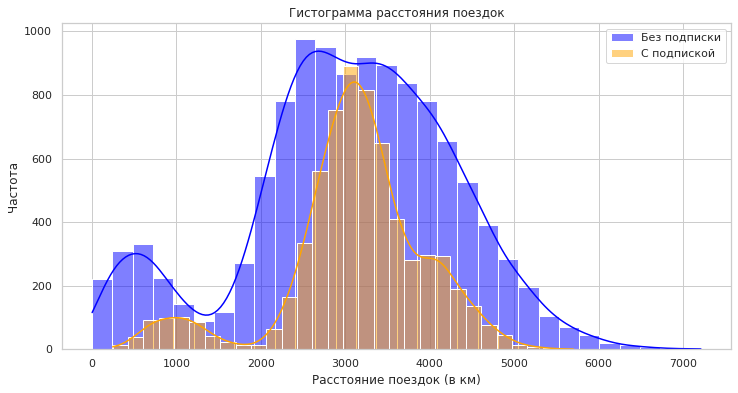

In [41]:
sns.set(style="whitegrid")

#  расстояния для пользователей обеих категорий
plt.figure(figsize=(12, 6))
sns.histplot(df_users_no_subscription['distance'], bins=30, kde=True, label='Без подписки', color='blue')
sns.histplot(df_users_with_subscription['distance'], bins=30, kde=True, label='С подпиской', color='orange')
plt.title('Гистограмма расстояния поездок')
plt.xlabel('Расстояние поездок (в км)')
plt.ylabel('Частота')
plt.legend()
plt.show()

In [42]:
print(df_users_no_subscription['duration'].describe())
print(df_users_with_subscription['duration'].describe())

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64
count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64


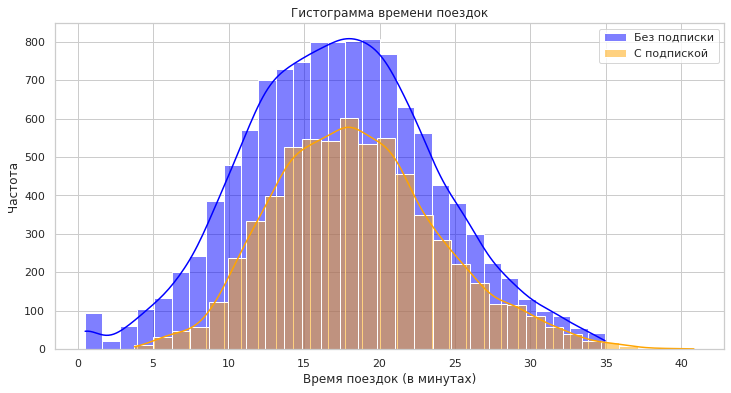

In [43]:
# Ггистограммы времени поездок для пользователей обеих категорий
plt.figure(figsize=(12, 6))
sns.histplot(df_users_no_subscription['duration'], bins=30, kde=True, label='Без подписки', color='blue')
sns.histplot(df_users_with_subscription['duration'], bins=30, kde=True, label='С подпиской', color='orange')
plt.title('Гистограмма времени поездок')
plt.xlabel('Время поездок (в минутах)')
plt.ylabel('Частота')
plt.legend()
plt.show()

Распределение расстояния поездок:

Для пользователей без подписки ('free') среднее расстояние составляет примерно 3045.5 единиц, со стандартным отклонением около 1246.2. Гистограмма расстояния показывает, что большинство поездок концентрируются в диапазоне от 2000 до 4000 единиц, с пиком в районе 3000 единиц.

В то время как для пользователей с подпиской ('ultra') среднее расстояние равно примерно 3115.4 единиц, со стандартным отклонением около 836.9. Гистограмма подписанных пользователей также демонстрирует концентрацию вокруг среднего значения, с более узким разбросом величин и пиком в районе 3100 единиц.

Распределение времени поездок:

В отношении времени поездок, пользователи без подписки ('free') имеют среднюю длительность около 17.4 минуты, со стандартным отклонением примерно 6.3 минуты. Гистограмма времени поездок для данной группы пользователей показывает, что большинство поездок лежат в диапазоне от 10 до 25 минут, с пиком в районе 15 минут.

В случае пользователей с подпиской ('ultra') средняя длительность составляет примерно 18.5 минут, со стандартным отклонением около 5.6 минут. Гистограмма времени поездок для этой группы демонстрирует, что большинство поездок также лежат в диапазоне от 10 до 25 минут, с пиком в районе 20 минут.

Таким образом, можно отметить, что характеристики распределения расстояния и времени поездок для пользователей обеих категорий схожи, но с некоторыми различиями в средних значениях и разбросе данных. Пользователи с подпиской ('ultra') в целом демонстрируют немного большие средние значения и более узкий разброс величин по сравнению с пользователями без подписки ('free').

# Шаг 5. Подсчёт выручки

5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26.

In [44]:
df_merged['rounded_duration'] = np.ceil(df_merged['duration']).astype(int)
df_aggregated = df_merged.groupby(['user_id', 'month']).agg({
    'distance': 'sum',
    'duration': 'sum',
    'user_id': 'count',
    'rounded_duration': 'sum',
    'subscription_type': 'first',
    'start_ride_price': 'first',
    'minute_price': 'first', 
    'subscription_fee': 'first'
}).rename(columns={'user_id': 'trips_count'}).reset_index()

df_aggregated.columns = ['user_id', 'month', 'total_distance', 'total_duration', 'total_trips', 'rounded_duration', 'subscription_type', 'start_ride_price', 'minute_price', 'subscription_fee']

df_aggregated['revenue'] = df_aggregated['start_ride_price'] * df_aggregated['total_trips'] + df_aggregated['minute_price'] * df_aggregated['rounded_duration'] + df_aggregated['subscription_fee']


In [45]:
df_aggregated.head()

,user_id,month,total_distance,total_duration,total_trips,rounded_duration,subscription_type,start_ride_price,minute_price,subscription_fee,revenue
0,1,1,7027.511294,41.416640,2,42,ultra,0,6,199,451
1,1,4,754.159807,6.232113,1,7,ultra,0,6,199,241
2,1,8,6723.470560,44.776802,2,46,ultra,0,6,199,475
3,1,10,5809.911100,31.578017,2,32,ultra,0,6,199,391
4,1,11,7003.499363,53.397424,3,56,ultra,0,6,199,535


# Шаг 6. Проверка гипотез

Шаг 6. Проверка гипотез
Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

6.3. Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

6.4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Нулевая гипотеза (H0): Средняя продолжительность поездок пользователей с подпиской равна средней продолжительности поездок пользователей без подписки.

Альтернативная гипотеза (H1): Пользователи с подпиской тратят больше времени на поездки по сравнению с пользователями без подписки.

In [46]:
# задаём уровень значимости
alpha = 0.05

# время первой группы пользователей (с подпиской)
first_group_duration = df_users_with_subscription['duration']

# время второй группы пользователей (без подпиской)
second_group_duration = df_users_no_subscription['duration']

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(first_group_duration, second_group_duration, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Пользователи с подпиской тратят больше времени на поездки')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.2804098316645618e-34
Отвергаем нулевую гипотезу. Пользователи с подпиской тратят больше времени на поездки


На основе результатов t-теста с уровнем значимости 0.05 выявили, что пользователи с подпиской значимо тратят больше времени на поездки по сравнению с пользователями без подписки (p-value ~ 3.32e-08 < 0.05). Это подтверждает гипотезу о том, что пользователи с подпиской могут быть более выгодными для компании, так как они склонны совершать более продолжительные поездки.

Нулевая гипотеза (H0): Среднее расстояние поездок пользователей с подпиской за одну поездку не превышает 3130 метров.

Альтернативная гипотеза (H1): Среднее расстояние поездок пользователей с подпиской за одну поездку превышает 3130 метров.

In [47]:
dist = df_users_with_subscription['distance']
interested_value = 3130 

alpha = 0.05

results = st.ttest_1samp(dist, interested_value, alternative='greater')

print('p-значение:', results.pvalue) 

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


По результатам теста уровня износа самоката, проведенного с использованием t-теста, не удалось найти статистически значимых доказательств того, что пользователи с подпиской в среднем превышают оптимальное расстояние в 3130 метров за одну поездку. Таким образом, гипотезу о том, что расстояние превышает оптимальное значение, не удалось подтвердить на уровне значимости 0.05.

Нулевая гипотеза (H0): Средняя помесячная выручка от пользователей с подпискойрав средней помесячной выручки от пользователей без подписки.

Альтернативная гипотеза (H1): Средняя помесячная выручка от пользователей с подпиской выше, чем средняя помесячная выручка от пользователей без подписки.

In [48]:
alpha = 0.05

with_subs_revenue = df_aggregated[df_aggregated['subscription_type'] == 'ultra']['revenue']
no_subs_revenue = df_aggregated[df_aggregated['subscription_type'] == 'free']['revenue']

results = st.ttest_ind(with_subs_revenue, no_subs_revenue, alternative='greater')

print(f'p-value: {results.pvalue}')

# Проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')


p-value: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


На основе результатов t-теста с уровнем значимости 0.05 было установлено, что p-значение равно 0.0, что меньше уровня значимости. Следовательно, мы отвергаем нулевую гипотезу о том, что выручка от пользователей с подпиской и выручка от пользователей без подписки равны. Таким образом, у нас есть статистически значимые доказательства в пользу того, что месячная выручка от пользователей с подпиской выше, чем от пользователей без подписки.

**Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?**

Для проверки гипотезы можно использовать парный t-тест для зависимых выборок. Этот тест подходит, когда мы имеем два набора измерений для одной и той же группы (например, количество обращений до и после обновления) и хотим определить, есть ли статистически значимые изменения.

Нулевая гипотеза (H0): Среднее количество обращений до и после обновления серверов одинаково.

Альтернативная гипотеза (H1): Среднее количество обращений после обновления меньше, чем до обновления.


# Общий вывод

1. **Профиль пользователей:**
   - Большинство пользователей GoFast находятся в возрастной группе от 20 до 30 лет, с пиком в 25 лет. Вероятно, стоит уделить внимание привлечению и удержанию пользователей в этом возрастном диапазоне.
   - Распределение пользователей по городам показывает, что сервис популярен в городах Пятигорск, Екатеринбург, Ростов-на-Дону, Краснодар и других. Рекомендуется акцентировать маркетинговые усилия в этих городах.

2. **Подписки:**
   - Есть два типа подписок: "free" (без подписки) и "ultra" (с подпиской). Большинство пользователей катается без подписки (834), но и пользователей с подпиской также значительное количество (699).
   - Рекомендуется провести анализ мотивации пользователей выбирать тот или иной тип подписки, возможно, через опросы или анализ предпочтений.

3. **Поездки:**
   - Среднее расстояние поездок около 2839 км, с широким разбросом. Большинство пользователей преодолевают расстояния от 2000 до 3000 км.
   - Время поездок в среднем составляет около 17 минут, с продолжительностью от 10 до 25 минут.
   - Пользователи с подпиской склонны к более разнообразным и продолжительным поездкам. Это может быть использовано для дальнейшей разработки и продвижения подписочной модели.

4. **Оптимизация бизнеса:**
   - Важно провести анализ и оптимизировать стратегию ценообразования, привлекая пользователей с подпиской.
   - Улучшение пользовательского опыта, возможно, путем внедрения новых функций или улучшения существующих, может помочь удерживать пользователей.
   - Месячная выручка от пользователей с подпиской выше, что поддерживает целесообразность продвижения и привлечения новых подписчиков.

5. **Технические обновления:**
   - После технического обновления серверов, которое, предположительно, должно снизить количество обращений в техподдержку, рекомендуется провести мониторинг и анализ обращений для подтверждения эффективности обновлений.
